In [1]:
import cv2
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Path to the image and label file
image_path = "football-players-detection-2/train/images/2e57b9_1_1_png.rf.4c067867a769f57c7a62364259b49950.jpg"
label_path = "football-players-detection-2/train/labels/2e57b9_1_1_png.rf.4c067867a769f57c7a62364259b49950.txt"


In [3]:
# Load the image
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

# Define class labels
class_labels = ['ball', 'goalkeeper', 'player', 'referee']

In [4]:
# Function to draw bounding boxes on the image
def draw_bounding_boxes(image, label_path):
    with open(label_path, 'r') as f:
        for line in f.readlines():
            # Parse each line in the YOLO format file
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            
            # Calculate the bounding box coordinates
            x_center, y_center = int(x_center * image_width), int(y_center * image_height)
            width, height = int(width * image_width), int(height * image_height)
            x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
            x2, y2 = int(x_center + width / 2), int(y_center + height / 2)
            
            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
            label = class_labels[int(class_id)]
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return image

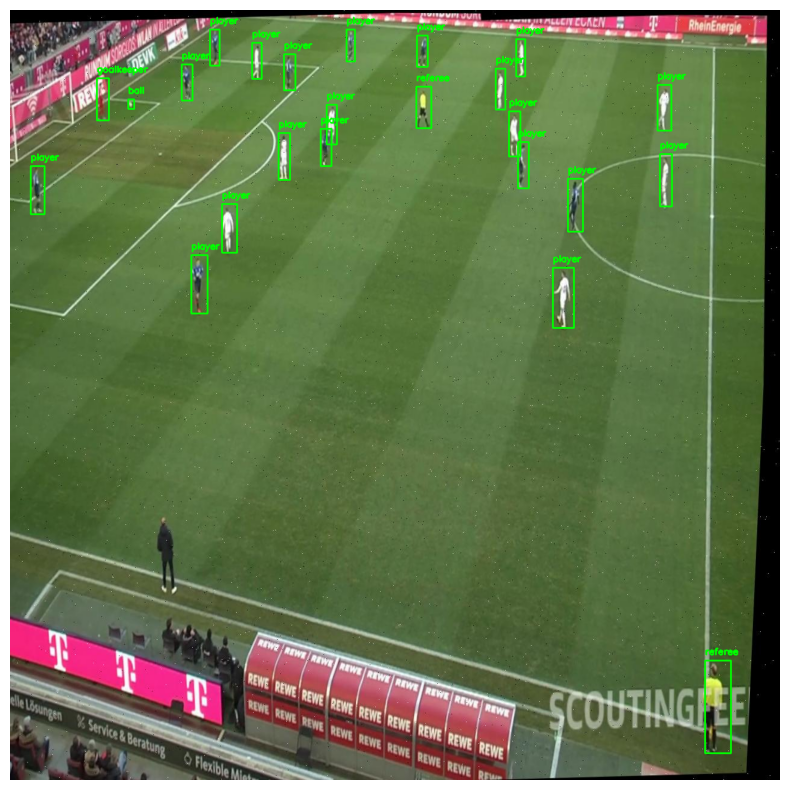

In [5]:
# Draw the bounding boxes
image_with_boxes = draw_bounding_boxes(image, label_path)

# Convert color from BGR (OpenCV) to RGB (matplotlib)
image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis("off")
plt.show()